In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import sys
sys.path.append("/home/z5297792/UNSW-MRes/MRes/modules") 
from utils import plot_ellipse, smooth

df_eddies = pd.read_pickle('/srv/scratch/z5297792/Chapter2/SEACOFS_26yr_Eddy_Dataset/df_eddies_processed_1462_10650.pkl')
df_tilt_data = pd.read_pickle("/srv/scratch/z5297792/Chapter2/SEACOFS_26yr_Eddy_Dataset/Vertical_Eddy_Dataset/df_tilt_data.pkl")
df_eddies = df_eddies.merge(
    df_tilt_data[['Eddy', 'Day', 'TiltDis', 'TiltDir']],
    how='left',
    left_on=['Eddy', 'Day'],
    right_on=['Eddy', 'Day']
)
df_eddies


,Eddy,Day,Cyc,Lon,Lat,ic,jc,xc,yc,w,Q11,Q12,Q22,Rc,psi0,Age,Date,fname,TiltDis,TiltDir
0,1,1462,CE,156.969773,-28.461100,179,274,505.897600,1353.012251,-0.000033,-0.008769,0.001546,-0.007521,69.500036,70.832145,57,1994-01-02,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
1,1,1463,CE,156.993096,-28.433992,179,275,507.149717,1356.633687,-0.000030,-0.007934,0.000890,-0.007072,52.250752,156.388574,57,1994-01-03,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
2,1,1464,CE,157.097940,-28.381485,181,276,515.130000,1365.650728,-0.000028,-0.006920,0.001050,-0.006852,67.000485,56.418837,57,1994-01-04,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
3,1,1465,CE,157.094334,-28.315658,181,278,512.570772,1372.426342,-0.000033,-0.006959,0.002144,-0.009312,52.001786,31.355771,57,1994-01-05,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,31.669332,89.546110
4,1,1466,CE,157.106324,-28.346479,181,277,514.728351,1369.599726,-0.000029,-0.005883,0.001179,-0.008429,56.251116,29.524244,57,1994-01-06,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,33.600109,92.955602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115993,2927,10646,AE,157.825620,-37.030656,248,97,850.502045,476.447416,0.000013,0.002921,0.000642,0.003759,72.751791,-76.302293,24,2019-02-24,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,12.848125,334.097803
115994,2927,10647,AE,157.880796,-36.972725,249,98,853.608024,484.316677,0.000014,0.002819,0.000983,0.003948,74.250924,-47.064730,24,2019-02-25,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,13.627106,324.784689
115995,2927,10648,AE,157.868516,-36.874363,248,100,849.759258,494.400614,0.000014,0.002968,0.000566,0.003910,75.750780,-79.414689,24,2019-02-26,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
115996,2927,10649,AE,157.753058,-36.882303,246,99,840.037603,489.981707,0.000013,0.002804,0.000722,0.003863,76.000006,-92.084211,24,2019-02-27,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN


In [2]:
with open('/srv/scratch/z5297792/Chapter2/SEACOFS_26yr_Eddy_Dataset/Vertical_Eddy_Dataset/dic_vert_eddies.pkl', 'rb') as f:
    dic_eddies_vert = pickle.load(f)
sample_eddies = [474, 971, 1917, 1978, 33, 207, 1783, 2370]
dic_sample = {}
for eddy in sample_eddies:
    eddy = f'Eddy{eddy}'
    dic_sample[eddy] = dic_eddies_vert[eddy]
# Unique colors for each eddy
colors = [c for i, c in enumerate(plt.get_cmap("tab10").colors) if i != 7]


In [6]:
import netCDF4 as nc
from scipy.interpolate import griddata
import netCDF4 as nc
from scipy.interpolate import RegularGridInterpolator

fname = f'/srv/scratch/z3533156/26year_BRAN2020/outer_avg_01461.nc'
dataset = nc.Dataset(fname)

lon_rho = np.transpose(dataset.variables['lon_rho'], axes=(1, 0))
lat_rho = np.transpose(dataset.variables['lat_rho'], axes=(1, 0))
mask_rho = np.transpose(dataset.variables['mask_rho'], axes=(1, 0))
h =  np.transpose(dataset.variables['h'], axes=(1, 0))
angle = dataset.variables['angle'][0, 0]
z_r = np.load('/srv/scratch/z5297792/z_r.npy')
z_r = np.transpose(z_r, (1, 2, 0))#[150, 150, :]

def distance(lat1, lon1, lat2, lon2):
    EARTH_RADIUS = 6357
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat, dlon = lat2 - lat1, lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return EARTH_RADIUS * 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

j_mid = lon_rho.shape[1] // 2
i_mid = lon_rho.shape[0] // 2

dx = distance(lat_rho[:-1, j_mid], lon_rho[:-1, j_mid],
              lat_rho[1:, j_mid], lon_rho[1:, j_mid])
dy = distance(lat_rho[i_mid, :-1], lon_rho[i_mid, :-1],
              lat_rho[i_mid, 1:], lon_rho[i_mid, 1:])

x_grid = np.insert(np.cumsum(dx), 0, 0)
y_grid = np.insert(np.cumsum(dy), 0, 0)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid, indexing='ij')


In [14]:
def eddy_boundary(xc, yc, zc, rc, n=360):
    """
    xc, yc, zc, rc: 1D arrays of equal length (levels)
    n: number of points along the boundary per level
    Returns x_b, y_b, z_b with shape (levels, n)
    """
    xc, yc, zc, rc = map(np.asarray, (xc, yc, zc, rc))
    theta = np.linspace(0, 2*np.pi, n, endpoint=False)[None, :]             # (1, n)
    R = rc[:, None]                                                         # (L, 1)
    X0, Y0, Z0 = xc[:, None], yc[:, None], zc[:, None]                      # (L, 1)

    x_b = X0 + R*np.cos(theta)                                              # (L, n)
    y_b = Y0 + R*np.sin(theta)                                              # (L, n)
    z_b = np.repeat(Z0, n, axis=1)                                          # (L, n)

    return x_b, y_b, z_b


In [27]:
df = dic_sample['Eddy33']['Day1545']

depths = -df.Depth.values.copy() / 1000  # in km
df['sRc']   = smooth(df.Rc, depths, window=50, num=1000)

x_b, y_b, z_b = eddy_boundary(df.x.values, df.y.values, depths, df.sRc.values)  # 180 points per level


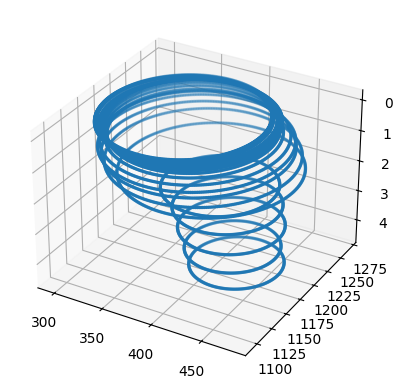

In [28]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_b, y_b, z_b, s=2)
ax.invert_zaxis()


In [29]:
def point_in_eddy(x, y, z, xc, yc, zc, rc):
    """
    Returns True if (x,y,z) is inside the eddy defined by centers (xc,yc,zc) and radii rc.
    
    xc, yc, zc, rc: 1D arrays (same length), giving centre and radius at each level.
    """
    # find nearest vertical level
    k = np.argmin(np.abs(zc - z))
    
    # distance in horizontal plane
    dx = x - xc[k]
    dy = y - yc[k]
    dist = np.hypot(dx, dy)
    
    return dist <= rc[k]
    

In [32]:
np.arange(lon_rho.shape[0])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [31]:
eddy = 33
dic_eddy = dic_sample[f'Eddy{eddy}']
df_eddy = df_eddies[df_eddies.Eddy == eddy]

max_vert_vels = []
fname_old = 0

for day in df_eddy.Day:
    df_vert = dic_eddy[f'Day{day}']
    df = df_eddy[df_eddy.Day == day]
    fname = df.fname

    if fname != fname_old:
        dataset = nc.Dataset(fname)
        w = dataset.variables['w']
        w = np.transpose(w, axes=(3, 2, 1, 0))
        w = np.flip(w, axis=2)
        fname_old = fname

    max_vert_vel = 0

    for i, j, k in zip(np.arange(X_grid.shape[0]), np.arange(X_grid.shape[1]), np.arange(X_grid.shape[2])):
        xp = X_grid[i,j]
        yp = Y_grid[i,j]
        zp = -z_r[i,j,k]/1000
    
        if point_in_eddy(xp, yp, zp, df_vert.x, df_vert.y, -df_vert.Depth/1000, df_vert.Rc):
            
            max_vert_vel = max(max_vert_vel, w[i,j,k])

    max_vert_vels.append(max_vert_vel)

df_eddy['MaxVertVel'] = max_vert_vels
    
    

,Eddy,Day,Cyc,Lon,Lat,ic,jc,xc,yc,w,Q11,Q12,Q22,Rc,psi0,Age,Date,fname,TiltDis,TiltDir
1451,33,1537,CE,155.315354,-29.652570,148,238,393.858805,1173.349897,-0.000045,-0.005905,0.001975,-0.016472,45.501219,30.861022,69,1994-03-18,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
1452,33,1538,CE,155.198532,-29.657035,145,237,383.304707,1169.026017,-0.000044,-0.006099,0.000007,-0.015681,8.012861,38.955192,69,1994-03-19,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
1453,33,1539,CE,155.047199,-29.643236,140,236,368.958402,1165.470480,-0.000040,-0.006668,-0.002053,-0.013330,44.501753,30.796958,69,1994-03-20,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
1454,33,1540,CE,154.957469,-29.589293,137,237,358.858572,1168.136301,-0.000040,-0.008294,-0.001971,-0.011709,57.752314,35.185992,69,1994-03-21,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,16.680585,229.677183
1455,33,1541,CE,154.913903,-29.534244,135,237,352.945159,1172.439443,-0.000039,-0.008985,-0.000292,-0.010574,46.251647,31.262524,69,1994-03-22,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,17.434836,250.077324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,33,1601,CE,152.180058,-34.091227,102,124,267.973408,609.821595,-0.000021,-0.007485,0.000204,-0.003207,46.000209,999999.975765,69,1994-05-21,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,9.651163,116.681900
1516,33,1602,CE,152.122641,-34.279413,102,119,269.588883,588.454765,-0.000018,-0.006572,-0.000262,-0.002539,48.002072,999999.975767,69,1994-05-22,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,9.936578,123.774432
1517,33,1603,CE,152.134859,-34.346773,104,118,273.016734,581.831368,-0.000019,-0.007915,-0.000269,-0.001811,54.500182,999999.975767,69,1994-05-23,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
1518,33,1604,CE,152.134090,-34.403234,104,117,274.930682,575.934991,-0.000017,-0.006356,0.000590,-0.002273,58.250041,999999.975767,69,1994-05-24,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN


In [46]:
import numpy as np
import netCDF4 as nc

def max_w_inside_eddy_for_day(df_vert, X_grid, Y_grid, z_r, w):
    """
    df_vert: DataFrame for this day with columns x, y, Depth [m], Rc [same units as X/Y]
    X_grid, Y_grid: (I,J)
    z_r: (I,J,K) depth [m, positive down]. We'll convert to km and negative for z (down = negative).
    w_ijk_or_ijkt: w array, either (I,J,K) or (T,I,J,K). If 4D, pass time_index.
    """
    I, J = X_grid.shape
    K = z_r.shape[2]

    # query depths for each (i,j,k): convert to km and make downward negative
    zq = -z_r.astype(np.float64) / 1000.0            # (I,J,K)

    # eddy profile as functions of z
    zc = (-df_vert.Depth.values / 1000.0).astype(np.float64)  # (L,) negative
    xc = df_vert.x.values.astype(np.float64)                   # (L,)
    yc = df_vert.y.values.astype(np.float64)                   # (L,)
    rc = df_vert.Rc.values.astype(np.float64)                  # (L,)

    # sort by z for monotonic interpolation
    order = np.argsort(zc)
    zc, xc, yc, rc = zc[order], xc[order], yc[order], rc[order]

    # broadcast X,Y to (I,J,K)
    X3 = np.repeat(X_grid[:, :, None], K, axis=2).astype(np.float64)
    Y3 = np.repeat(Y_grid[:, :, None], K, axis=2).astype(np.float64)

    # interpolate xc(z), yc(z), rc(z) at each (i,j,k)
    zflat = zq.ravel()
    # valid only within [min(zc), max(zc)]
    in_range = (zflat >= zc.min()) & (zflat <= zc.max())

    xc_z = np.full_like(zflat, np.nan, dtype=np.float64)
    yc_z = np.full_like(zflat, np.nan, dtype=np.float64)
    rc_z = np.full_like(zflat, np.nan, dtype=np.float64)

    xc_z[in_range] = np.interp(zflat[in_range], zc, xc)
    yc_z[in_range] = np.interp(zflat[in_range], zc, yc)
    rc_z[in_range] = np.interp(zflat[in_range], zc, rc)

    xc_z = xc_z.reshape(zq.shape)
    yc_z = yc_z.reshape(zq.shape)
    rc_z = rc_z.reshape(zq.shape)

    # inside mask at each voxel
    dist = np.hypot(X3 - xc_z, Y3 - yc_z)
    inside = (dist <= rc_z) & np.isfinite(rc_z)

    # max w inside; if nothing inside, return 0 (or np.nan if you prefer)
    if not np.any(inside):
        return np.nan
    return np.nanmax(np.where(inside, w.astype(np.float64), np.nan))


# === Your loop, cleaned & fast ===
df_sample = df_eddies[df_eddies.Eddy.isin(sample_eddies)]

fname_old = None

max_vert_vels = []
for eddy in sample_eddies:
    
    dic_eddy = dic_sample[f'Eddy{eddy}']
    df_eddy = df_eddies[df_eddies.Eddy == eddy].copy()
    
    for day in df_eddy.Day:
        df_vert = dic_eddy[f'Day{day}']

        if len(df_vert):
            fname = df_eddy.loc[df_eddy.Day == day, 'fname'].iloc[0]
        
            if fname != fname_old:
                dataset = nc.Dataset(fname)
        
                w_raw = dataset.variables['w']
                w_cached = np.transpose(w_raw, axes=(3, 2, 1, 0))
                w_cached = np.flip(w_cached, axis=2)
                w_cached = w_cached[:,:,1:,:].squeeze()
                ocean_time = dataset.variables['ocean_time'][:].data / 86400
        
                fname_old = fname
        
            t_idx = np.where(ocean_time == day)[0][0]
            w = w_cached[:,:,:,t_idx]
        
            max_w = max_w_inside_eddy_for_day(
                df_vert=df_vert,
                X_grid=X_grid, Y_grid=Y_grid, z_r=z_r,
                w=w
            )
            max_vert_vels.append(float(max_w))
        else:
            max_vert_vels.append(np.nan)
    
df_sample.loc[:, 'MaxVertVel'] = max_vert_vels


/scratch/pbs.6887936.kman.restech.unsw.edu.au/ipykernel_2717271/2492408443.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample.loc[:, 'MaxVertVel'] = max_vert_vels


In [47]:
df_sample


,Eddy,Day,Cyc,Lon,Lat,ic,jc,xc,yc,w,...,Q12,Q22,Rc,psi0,Age,Date,fname,TiltDis,TiltDir,MaxVertVel
1451,33,1537,CE,155.315354,-29.652570,148,238,393.858805,1173.349897,-0.000045,...,0.001975,-0.016472,45.501219,30.861022,69,1994-03-18,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN,0.000740
1452,33,1538,CE,155.198532,-29.657035,145,237,383.304707,1169.026017,-0.000044,...,0.000007,-0.015681,8.012861,38.955192,69,1994-03-19,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN,0.002630
1453,33,1539,CE,155.047199,-29.643236,140,236,368.958402,1165.470480,-0.000040,...,-0.002053,-0.013330,44.501753,30.796958,69,1994-03-20,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN,0.001333
1454,33,1540,CE,154.957469,-29.589293,137,237,358.858572,1168.136301,-0.000040,...,-0.001971,-0.011709,57.752314,35.185992,69,1994-03-21,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,16.680585,229.677183,0.001592
1455,33,1541,CE,154.913903,-29.534244,135,237,352.945159,1172.439443,-0.000039,...,-0.000292,-0.010574,46.251647,31.262524,69,1994-03-22,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,17.434836,250.077324,0.001275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94605,2370,8966,CE,151.865076,-34.410810,95,115,251.834186,566.748993,-0.000032,...,0.004795,-0.004411,62.000450,31.515500,57,2014-07-20,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,6.455069,198.511567,0.001205
94606,2370,8967,CE,151.659022,-34.635871,91,109,241.929032,536.945028,-0.000035,...,0.002833,-0.002779,52.500041,37.039697,57,2014-07-21,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,9.136433,206.154110,0.001013
94607,2370,8968,CE,151.576216,-34.743362,90,106,238.572331,523.205475,-0.000038,...,0.003809,-0.004341,39.751535,27.861044,57,2014-07-22,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN,0.000968
94608,2370,8969,CE,151.565852,-34.800538,90,105,239.701054,516.944818,-0.000032,...,0.002122,-0.005679,41.500728,40.052760,57,2014-07-23,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN,0.000641
